In [ ]:
# Setting seeds for reproductivity
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
#importing dependancies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
#Data Curation
#Uploading the kaggle.json file
!pip install kaggle

kaggle_credentials = json.load(open("/content/kaggle.json"))

In [ ]:
#setting up Kaggle API key as environment variable

os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [02:00<00:00, 21.1MB/s]
100% 2.04G/2.04G [02:00<00:00, 18.2MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#Unzipping the downloaded dataset

with ZipFile("/content/plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("/content/plantvillage dataset"))

print(len(os.listdir("/content/plantvillage dataset/segmented"))) #for images with maybe no background
print(os.listdir("/content/plantvillage dataset/segmented")[:5])

print(len(os.listdir("/content/plantvillage dataset/color"))) #for coloured images
print(os.listdir("/content/plantvillage dataset/color")[:5])

print(len(os.listdir("/content/plantvillage dataset/grayscale"))) #for B&W or grey images
print(os.listdir("/content/plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Soybean___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Apple___Black_rot', 'Potato___Early_blight']
38
['Soybean___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Apple___Black_rot', 'Potato___Early_blight']
38
['Soybean___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Apple___Black_rot', 'Potato___Early_blight']


Number of classes = 38.

In [ ]:
print(len(os.listdir("/content/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/color/Grape___healthy")[:5])

423
['69de7c79-dd0d-4793-95ca-92bb44c06cf5___Mt.N.V_HL 6076.JPG', '9bca2bb8-b017-4d2b-ae0a-257916d55952___Mt.N.V_HL 8937.JPG', '87c9d8e2-3009-4e40-9db4-8fe35ab76599___Mt.N.V_HL 6058.JPG', 'fed74aa9-511b-4958-824b-41066b2e5406___Mt.N.V_HL 8918.JPG', '8a5dff69-180d-4a14-b8e1-b9e1374202c5___Mt.N.V_HL 6098.JPG']


Data Preprocessing.

In [ ]:
#Dataset Path

base_dir = "/content/plantvillage dataset/color"

(256, 256, 3)


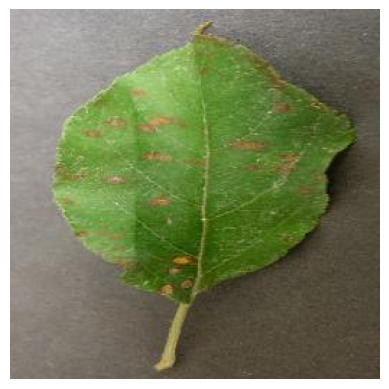

In [ ]:
image_path ="/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG"

#read the image
img = mpimg.imread(image_path)

print(img.shape)

#Display the image

plt.imshow(img)
plt.axis("off") # Hides the axis numbers

plt.show()

In [ ]:
#Image parameters

img_size = 224
batch_size = 32

Train Test Split

In [ ]:
#Image Data Generator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 #Use 20% of data for validation
)

In [ ]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode = "categorical"
)

Found 10849 images belonging to 38 classes.


***Convolution Neural Network***

In [ ]:
#Model Definition

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

In [ ]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
#Compile the Model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Model Training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #number of steps per epoch
    epochs = 5, #Number of epochs (basically how many batches you add)
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size #validation steps
)

Epoch 1/5
1358/1358 [==============================] - 145s 102ms/step - loss: 0.9670 - accuracy: 0.7366 - val_loss: 0.4511 - val_accuracy: 0.8580
Epoch 2/5
1358/1358 [==============================] - 136s 100ms/step - loss: 0.2799 - accuracy: 0.9097 - val_loss: 0.3863 - val_accuracy: 0.8789
Epoch 3/5
1358/1358 [==============================] - 112s 82ms/step - loss: 0.1369 - accuracy: 0.9547 - val_loss: 0.5086 - val_accuracy: 0.8587
Epoch 4/5
1358/1358 [==============================] - 123s 91ms/step - loss: 0.0895 - accuracy: 0.9719 - val_loss: 0.4995 - val_accuracy: 0.8746
Epoch 5/5
1358/1358 [==============================] - 101s 75ms/step - loss: 0.0717 - accuracy: 0.9769 - val_loss: 0.4815 - val_accuracy: 0.8910


Model Evalution

In [ ]:
#Evaluating model
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: (val_accuracy * 100: .2f)%")

Evaluating model...
339/339 [==============================] - 18s 53ms/step - loss: 0.4815 - accuracy: 0.8910
Validation Accuracy: (val_accuracy * 100: .2f)%


In [ ]:
# Plot training and Validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and Validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a predictable system

In [ ]:
# Function to load and Preprocess the Image using 'Pillow'
def load_and_preprocess_image(image_path, target_size = (224, 224)):
  #load the Image
  img = Image.open(image_path)
  #Resize the image
  img = img.resize(target_size)
  #Convert the image to a numpy array
  img_array = np.array(img)
  # Add batch dimension
  img_array = img_array.astype('float32') / 255.0
  return img_array

# Function to predict the class of an Image
def predict_image_class(image_path, model, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name


In [ ]:
#Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open("class_indices.json", "w"))

In [ ]:
from PIL import Image
import numpy as np

def predict_image_class(model, image_path, class_indices):
    # Load the image file
    with open(image_path, 'rb') as f:
        img = Image.open(f)
        img = img.convert('RGB')

    # Preprocess the image to fit the model input requirements
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]

    return predicted_class_name

# Example Usage
image_path = "/content/test_apple_black_rot.JPG"
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print(f"The predicted class name:", predicted_class_name)


1/1 [==============================] - 0s 36ms/step
The predicted class name: Apple___Black_rot


In [ ]:
model.save("plant_disease_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
